In [ ]:
#importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
import sklearn as sk
import seaborn as sns

In [1]:
#Reading data set

In [2]:
df = pd.read_csv('test_data.csv')

In [3]:
#Scanning the data frame

In [9]:
df.head()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.001827,0.033693,0.114755,0.997927,0.562604,0.866499,0.578042,0.914615,0.026864,0.038641,...,0.653230,0.186104,0.430398,0.016678,0.885352,0.652733,0.788235,0.054788,0.031313,Thalasse
1,0.436679,0.972653,0.084998,0.180909,0.675736,0.563889,0.798382,0.670361,0.376092,0.184890,...,0.833540,0.153001,0.458533,0.401845,0.635969,0.574425,0.047025,0.607985,0.594123,Diabetes
2,0.545697,0.324815,0.584467,0.475748,0.558596,0.661007,0.934056,0.381782,0.500342,0.531829,...,0.678901,0.220479,0.817151,0.690981,0.101633,0.855740,0.551124,0.413294,0.070909,Heart Di
3,0.172994,0.050351,0.736000,0.782022,0.069435,0.085219,0.032907,0.460619,0.785448,0.491495,...,0.381500,0.459396,0.420154,0.798537,0.399236,0.324600,0.499504,0.436662,0.242766,Diabetes
4,0.758534,0.739968,0.597868,0.772683,0.875720,0.860265,0.486189,0.486686,0.621048,0.191756,...,0.993381,0.272338,0.663579,0.265227,0.918847,0.804910,0.571119,0.188368,0.750848,Heart Di


In [ ]:
#dimensions

In [11]:
df.shape

(486, 25)

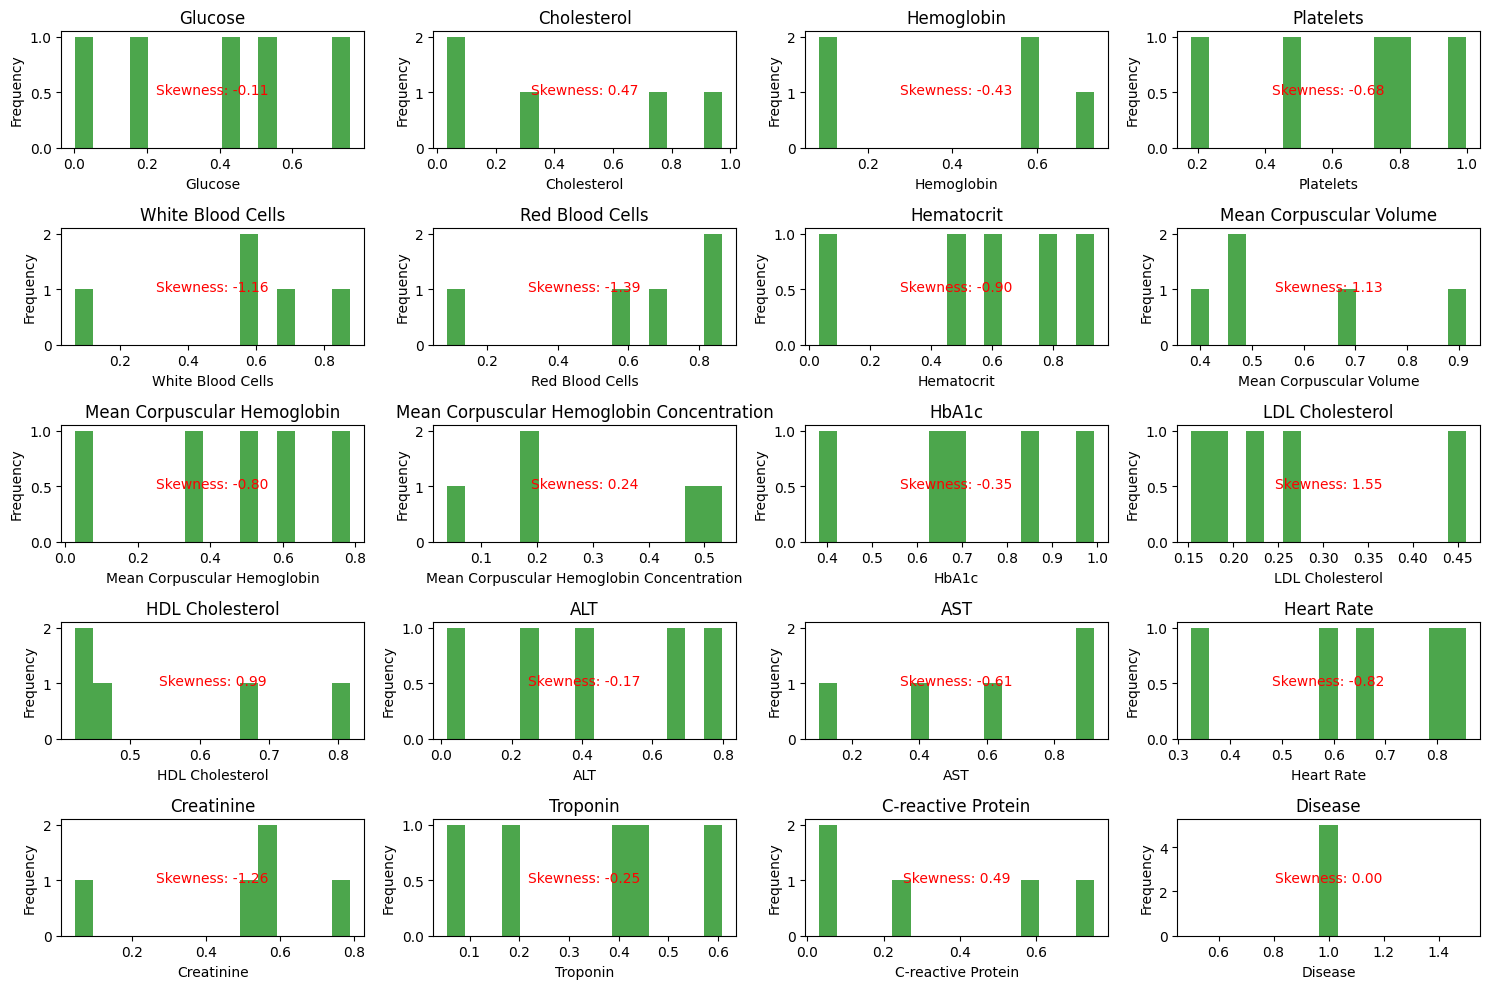

Skewness:
Glucose                                     -0.113997
Cholesterol                                  0.472423
Hemoglobin                                  -0.430616
Platelets                                   -0.680997
White Blood Cells                           -1.156084
Red Blood Cells                             -1.387982
Hematocrit                                  -0.896377
Mean Corpuscular Volume                      1.128607
Mean Corpuscular Hemoglobin                 -0.799271
Mean Corpuscular Hemoglobin Concentration    0.237830
HbA1c                                       -0.346730
LDL Cholesterol                              1.546788
HDL Cholesterol                              0.992027
ALT                                         -0.168286
AST                                         -0.610457
Heart Rate                                  -0.821432
Creatinine                                  -1.262833
Troponin                                    -0.250648
C-reactive Protein

In [97]:
# Calculate skewness for numerical columns
import matplotlib.pyplot as plt
skewness = df.select_dtypes(include=['int64', 'float64']).skew()

# Count the number of numerical columns
num_cols_count = len(df.select_dtypes(include=['int64', 'float64']).columns)

# Determine the layout for subplots
num_rows = (num_cols_count + 3) // 4  # Adjust the number of columns in each row
num_cols = min(4, num_cols_count)  # Maximum of 4 columns in each row

# Plot histograms for numerical columns to visualize distributions and identify anomalies
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

for i in range(num_rows):
    for j in range(num_cols):
        col_idx = i * num_cols + j
        if col_idx < num_cols_count:
            col = df.select_dtypes(include=['int64', 'float64']).columns[col_idx]
            axes[i, j].hist(df[col], bins=15, color='green', alpha=0.7)
            axes[i, j].set_title(f'{col}')
            axes[i, j].set_xlabel(col)
            axes[i, j].set_ylabel('Frequency')
            
            # Compute skewness
            skew_val = skewness[col]
            
            # Plot skewness value in the center of plot
            axes[i, j].text(0.5, 0.5, f'Skewness: {skew_val:.2f}', horizontalalignment='center',
                            verticalalignment='center', transform=axes[i, j].transAxes, fontsize=10, color='red')

plt.tight_layout()
plt.show()

# Print skewness values
print("Skewness:")
print(skewness)

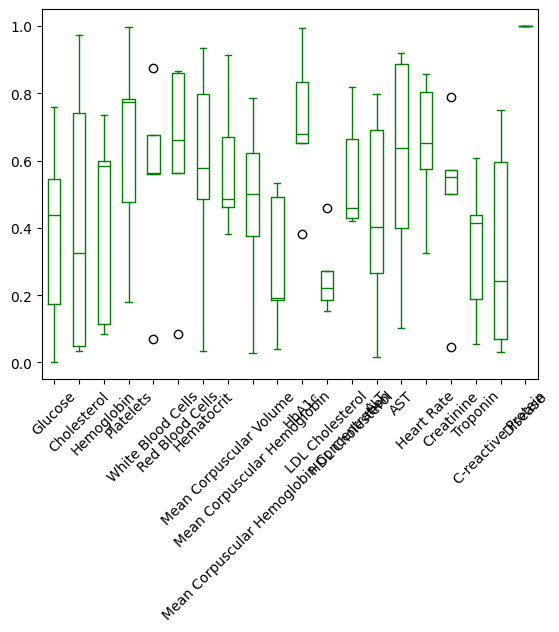

In [99]:
df.plot(kind='box', rot=45,color='green')

# Show the plot
plt.show()

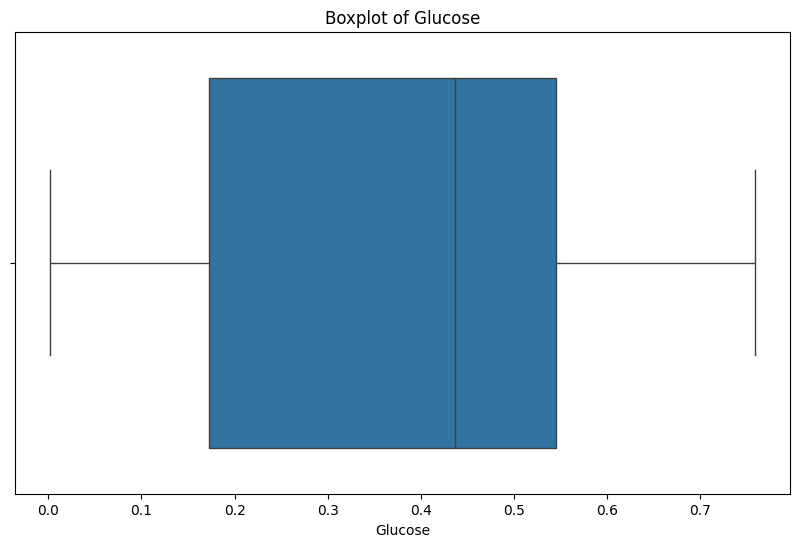

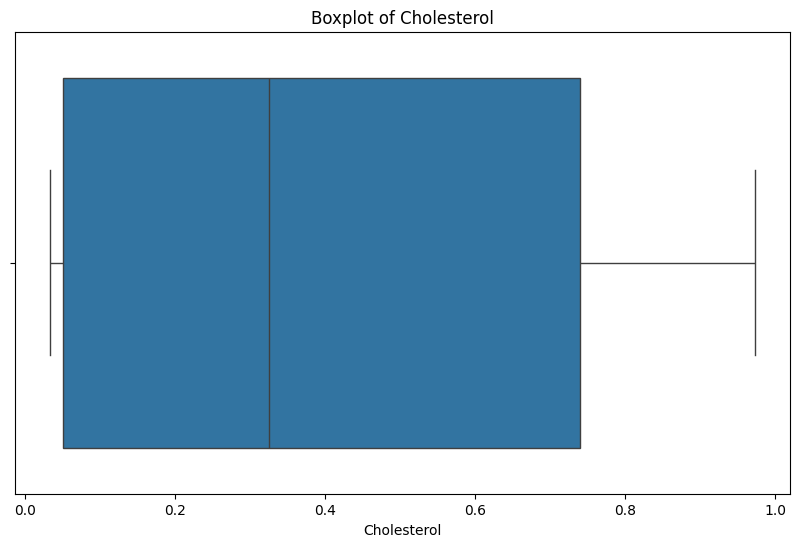

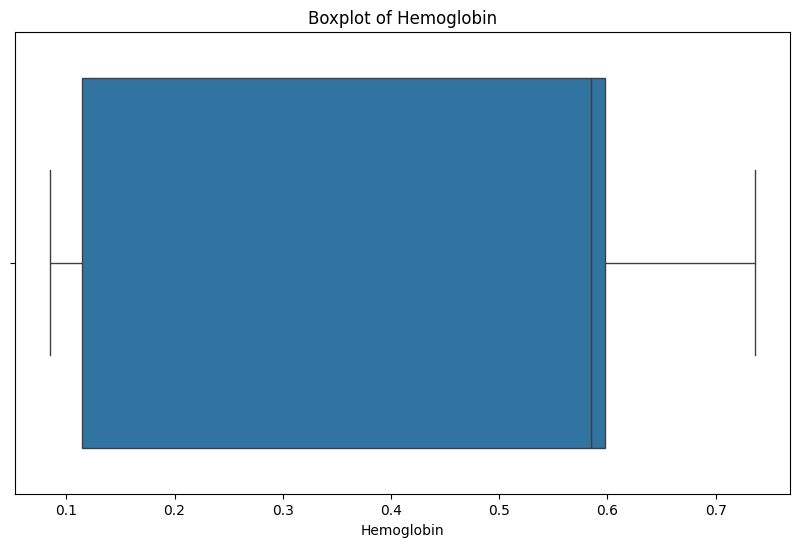

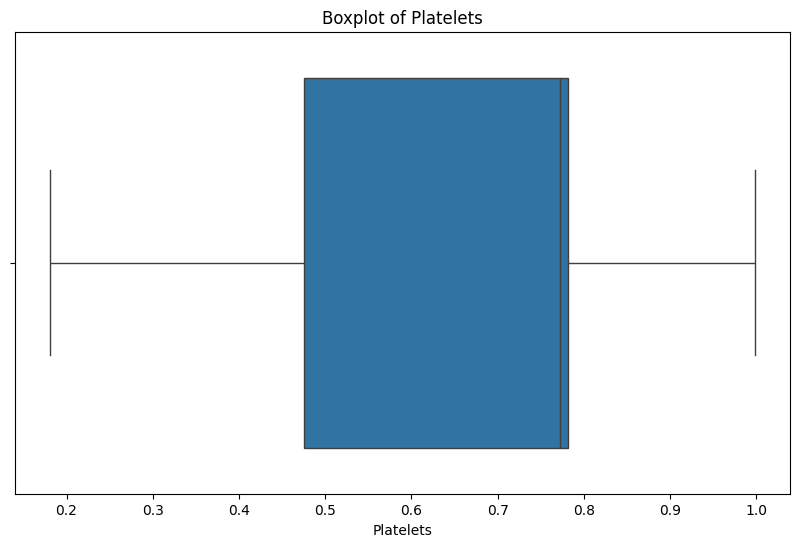

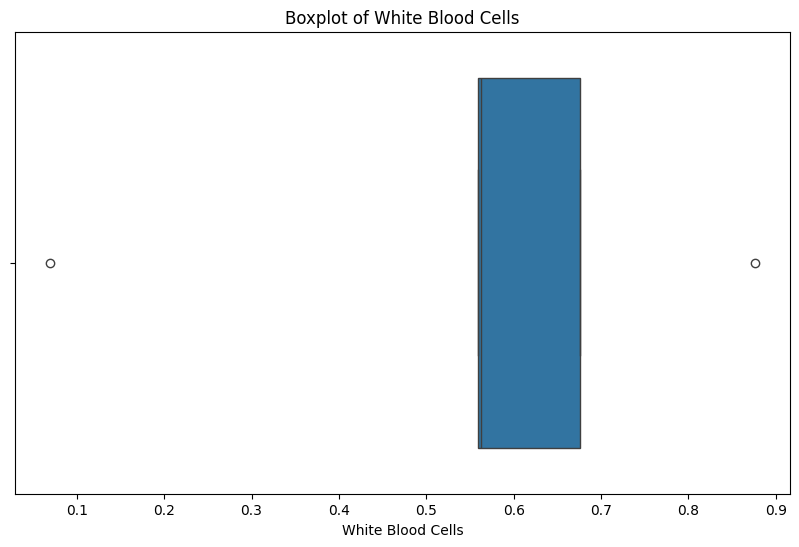

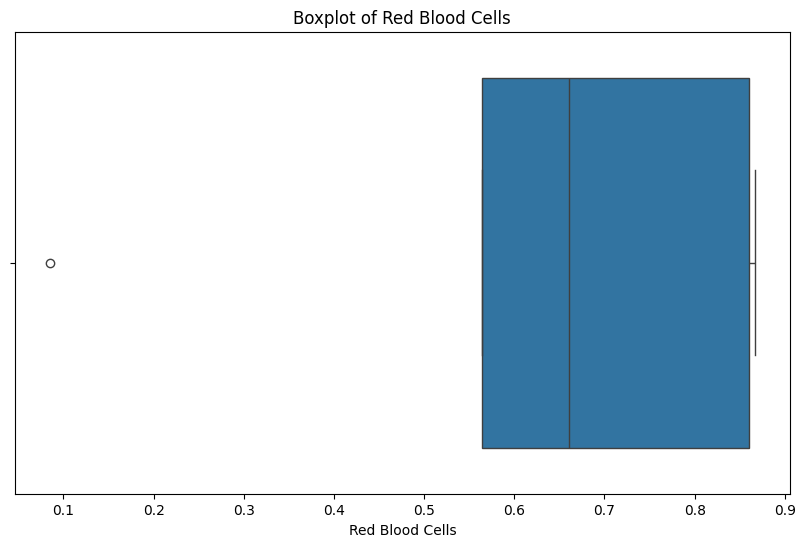

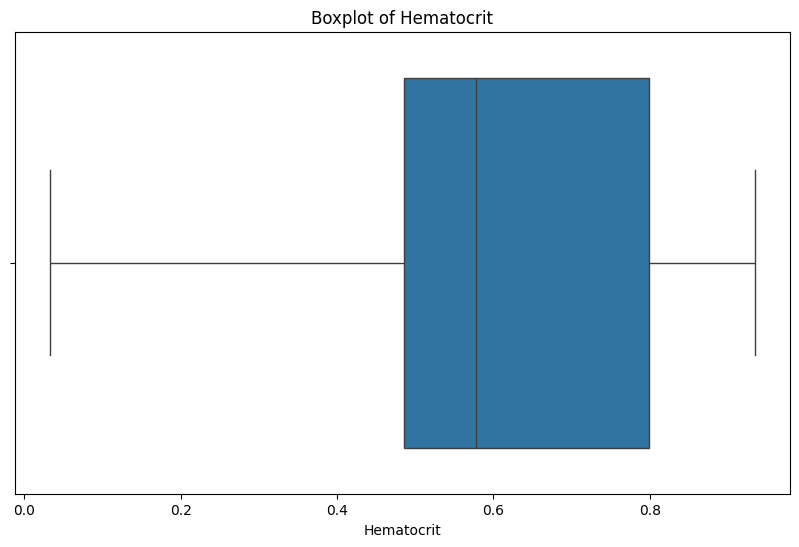

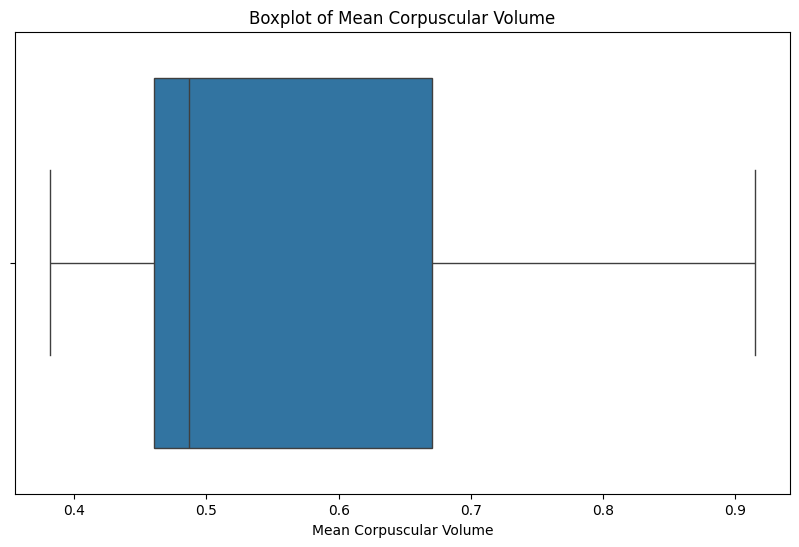

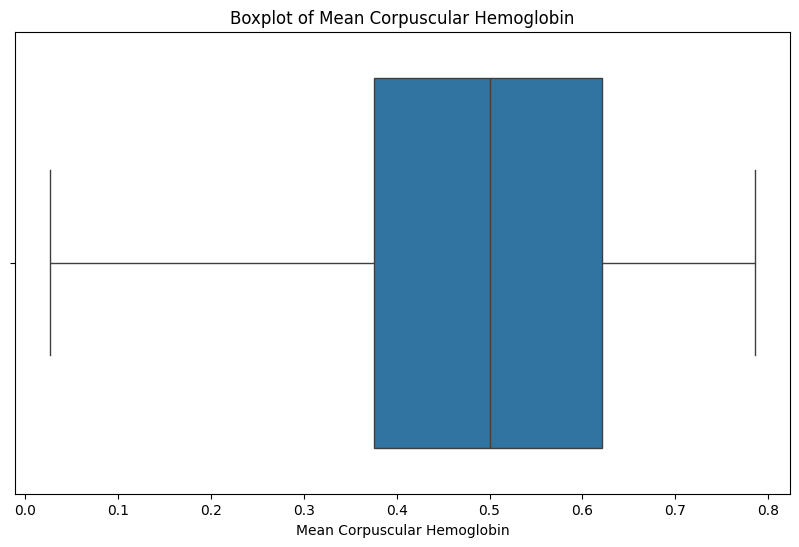

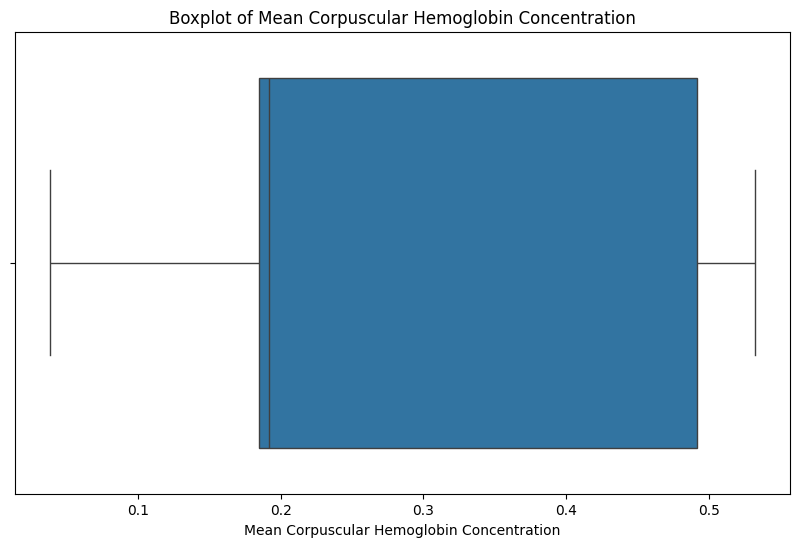

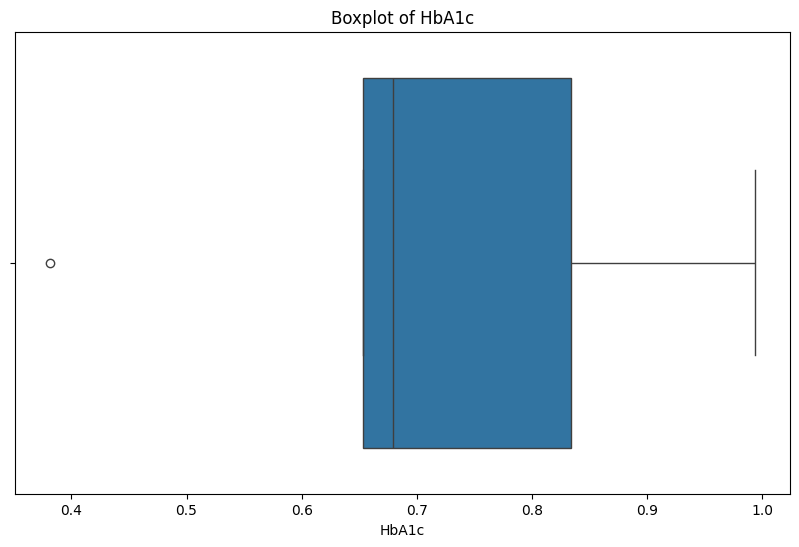

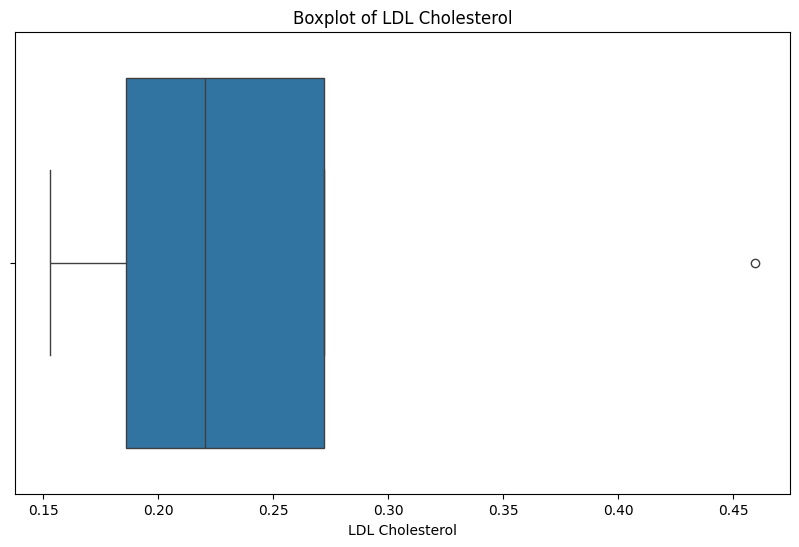

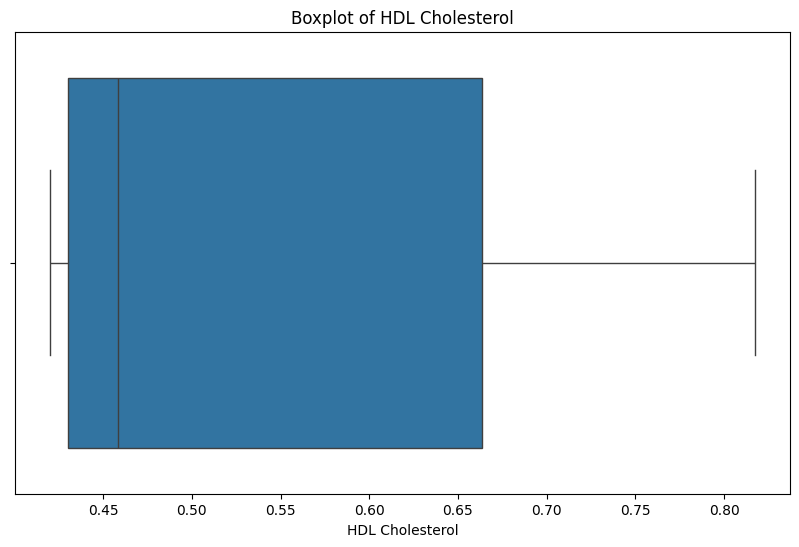

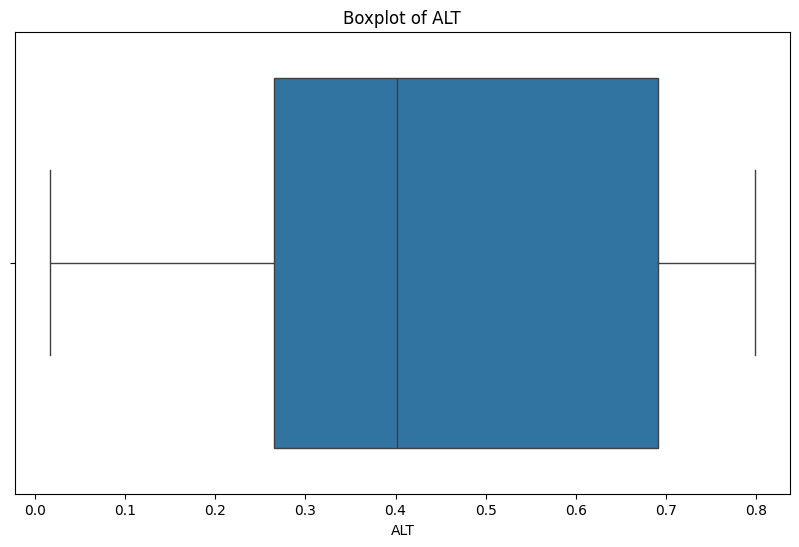

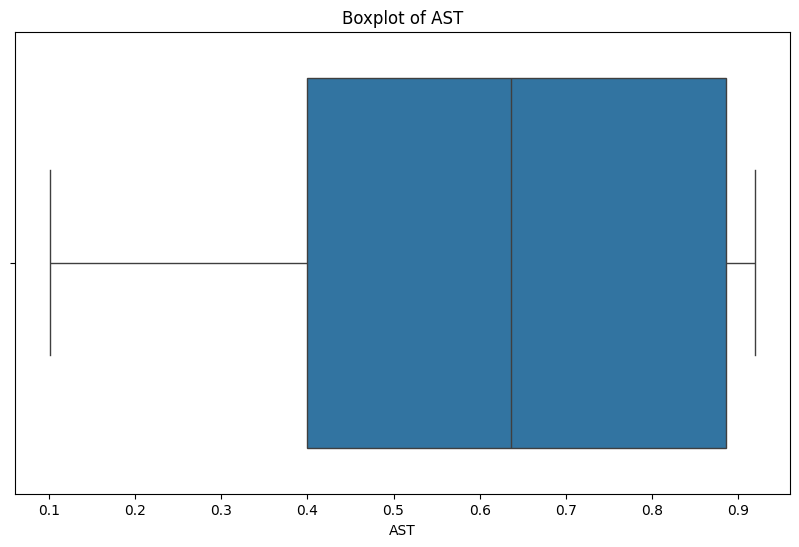

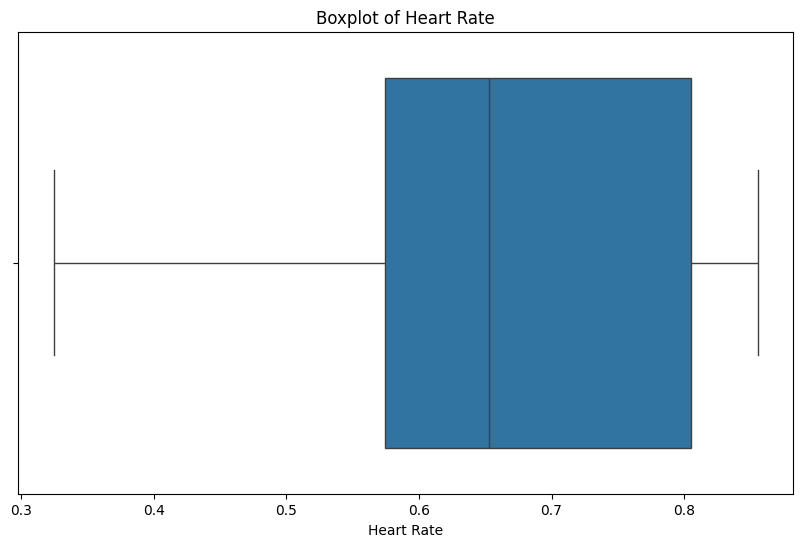

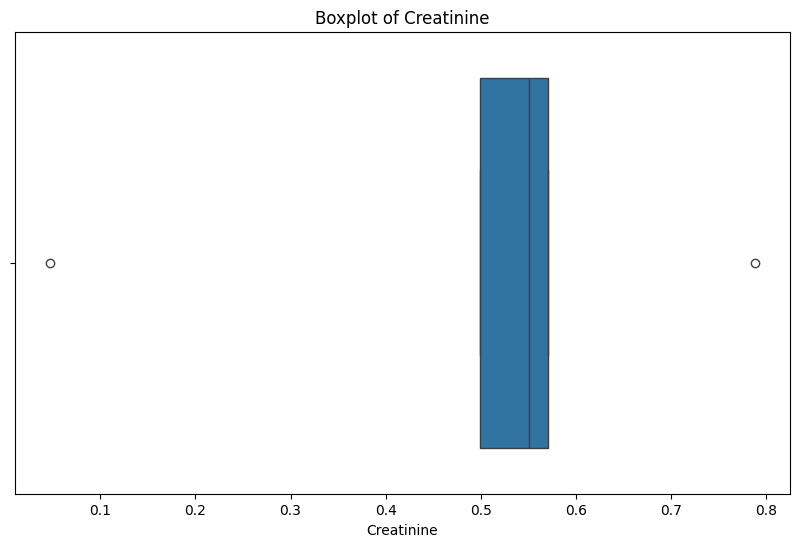

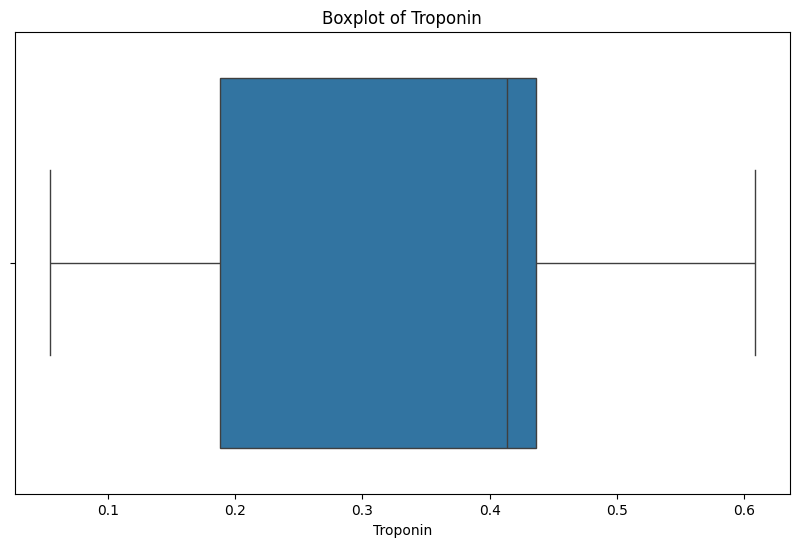

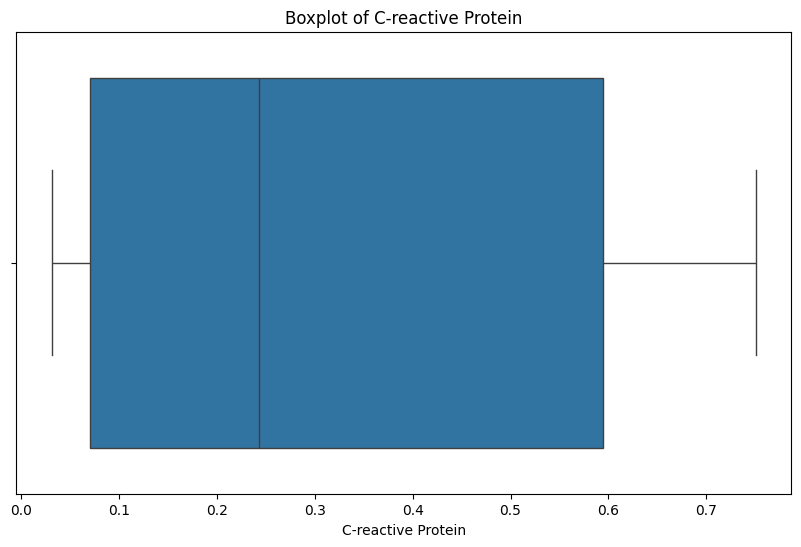

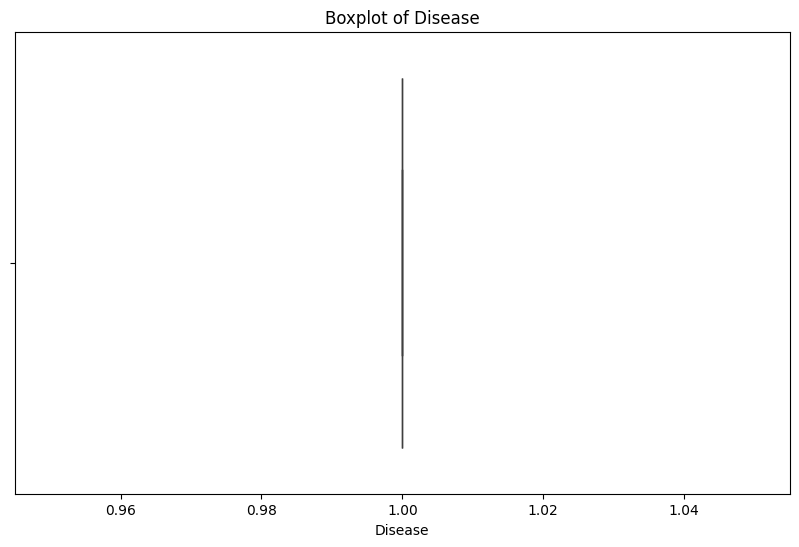

In [101]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Plotting boxplots for each numerical feature to identify outliers
for column in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 20 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Glucose                                    5 non-null      float64
 1   Cholesterol                                5 non-null      float64
 2   Hemoglobin                                 5 non-null      float64
 3   Platelets                                  5 non-null      float64
 4   White Blood Cells                          5 non-null      float64
 5   Red Blood Cells                            5 non-null      float64
 6   Hematocrit                                 5 non-null      float64
 7   Mean Corpuscular Volume                    5 non-null      float64
 8   Mean Corpuscular Hemoglobin                5 non-null      float64
 9   Mean Corpuscular Hemoglobin Concentration  5 non-null      float64
 10  HbA1c                         

In [14]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Glucose,486.000,0.490,0.284,0.002,0.237,0.496,0.727,0.992
Cholesterol,486.000,0.507,0.283,0.003,0.268,0.502,0.755,1.000
Hemoglobin,486.000,0.486,0.299,0.001,0.202,0.478,0.750,0.998
Platelets,486.000,0.528,0.293,0.000,0.276,0.539,0.789,1.000
White Blood Cells,486.000,0.510,0.291,-0.000,0.265,0.511,0.768,1.000
Red Blood Cells,486.000,0.504,0.303,0.001,0.219,0.518,0.768,0.997
Hematocrit,486.000,0.501,0.295,0.005,0.246,0.496,0.761,1.001
Mean Corpuscular Volume,486.000,0.516,0.280,0.000,0.288,0.533,0.747,0.996
Mean Corpuscular Hemoglobin,486.000,0.510,0.285,-0.001,0.260,0.498,0.762,0.999
Mean Corpuscular Hemoglobin Concentration,486.000,0.501,0.291,0.001,0.256,0.494,0.735,1.000


In [ ]:
#Finding missing value

In [16]:
df.isnull()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
482,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
483,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
484,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
#Which columns are missing values and what is the extent of missingness??

In [18]:
df.isnull().sum()/len(df)*100

Glucose                                     0.000
Cholesterol                                 0.000
Hemoglobin                                  0.000
Platelets                                   0.000
White Blood Cells                           0.000
Red Blood Cells                             0.000
Hematocrit                                  0.000
Mean Corpuscular Volume                     0.000
Mean Corpuscular Hemoglobin                 0.000
Mean Corpuscular Hemoglobin Concentration   0.000
Insulin                                     0.000
BMI                                         0.000
Systolic Blood Pressure                     0.000
Diastolic Blood Pressure                    0.000
Triglycerides                               0.000
HbA1c                                       0.000
LDL Cholesterol                             0.000
HDL Cholesterol                             0.000
ALT                                         0.000
AST                                         0.000


In [21]:
import missingno as msno

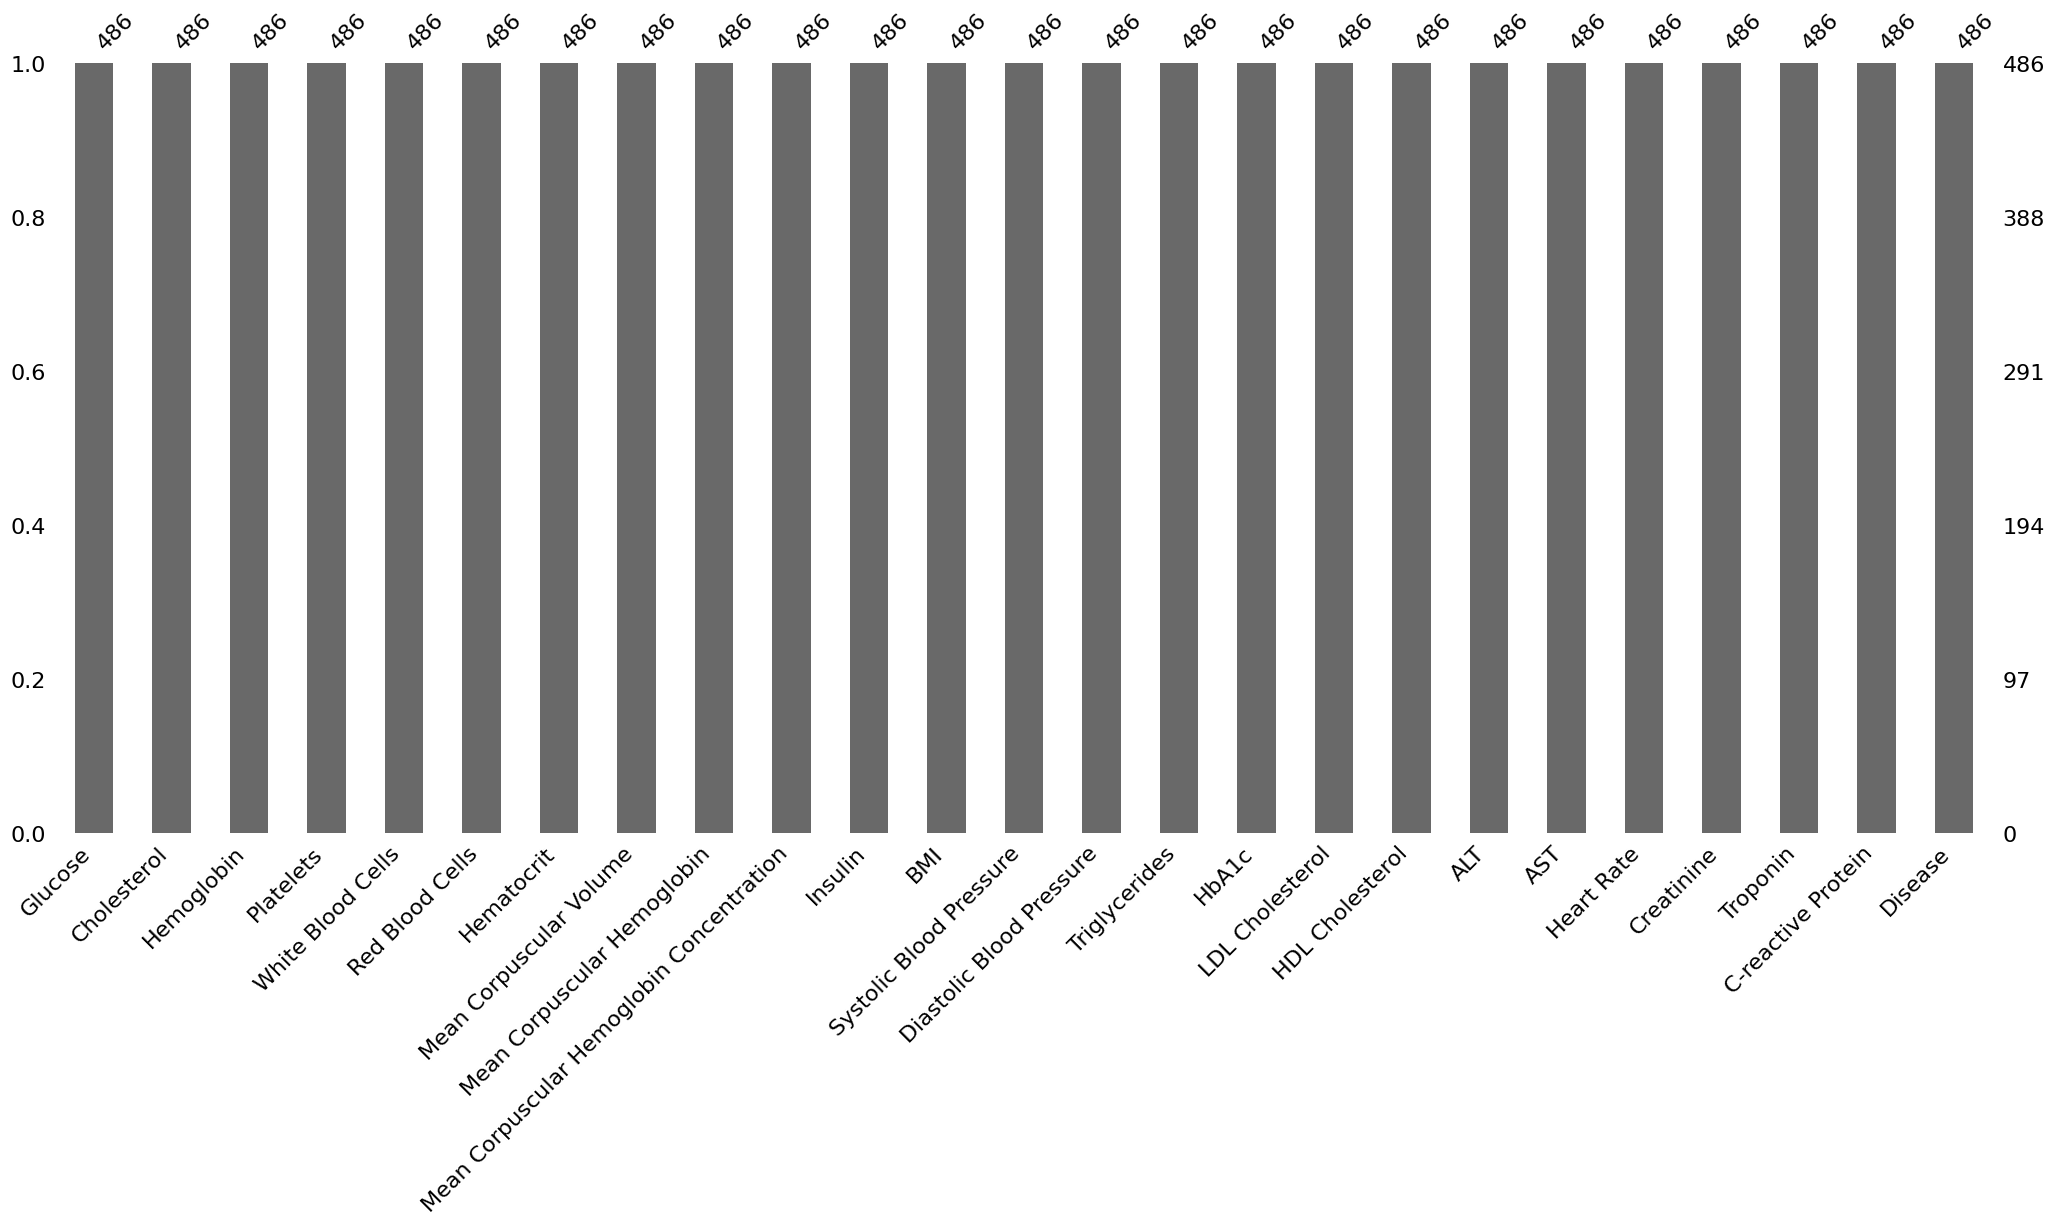

In [22]:
msno.bar(df)
plt.show()

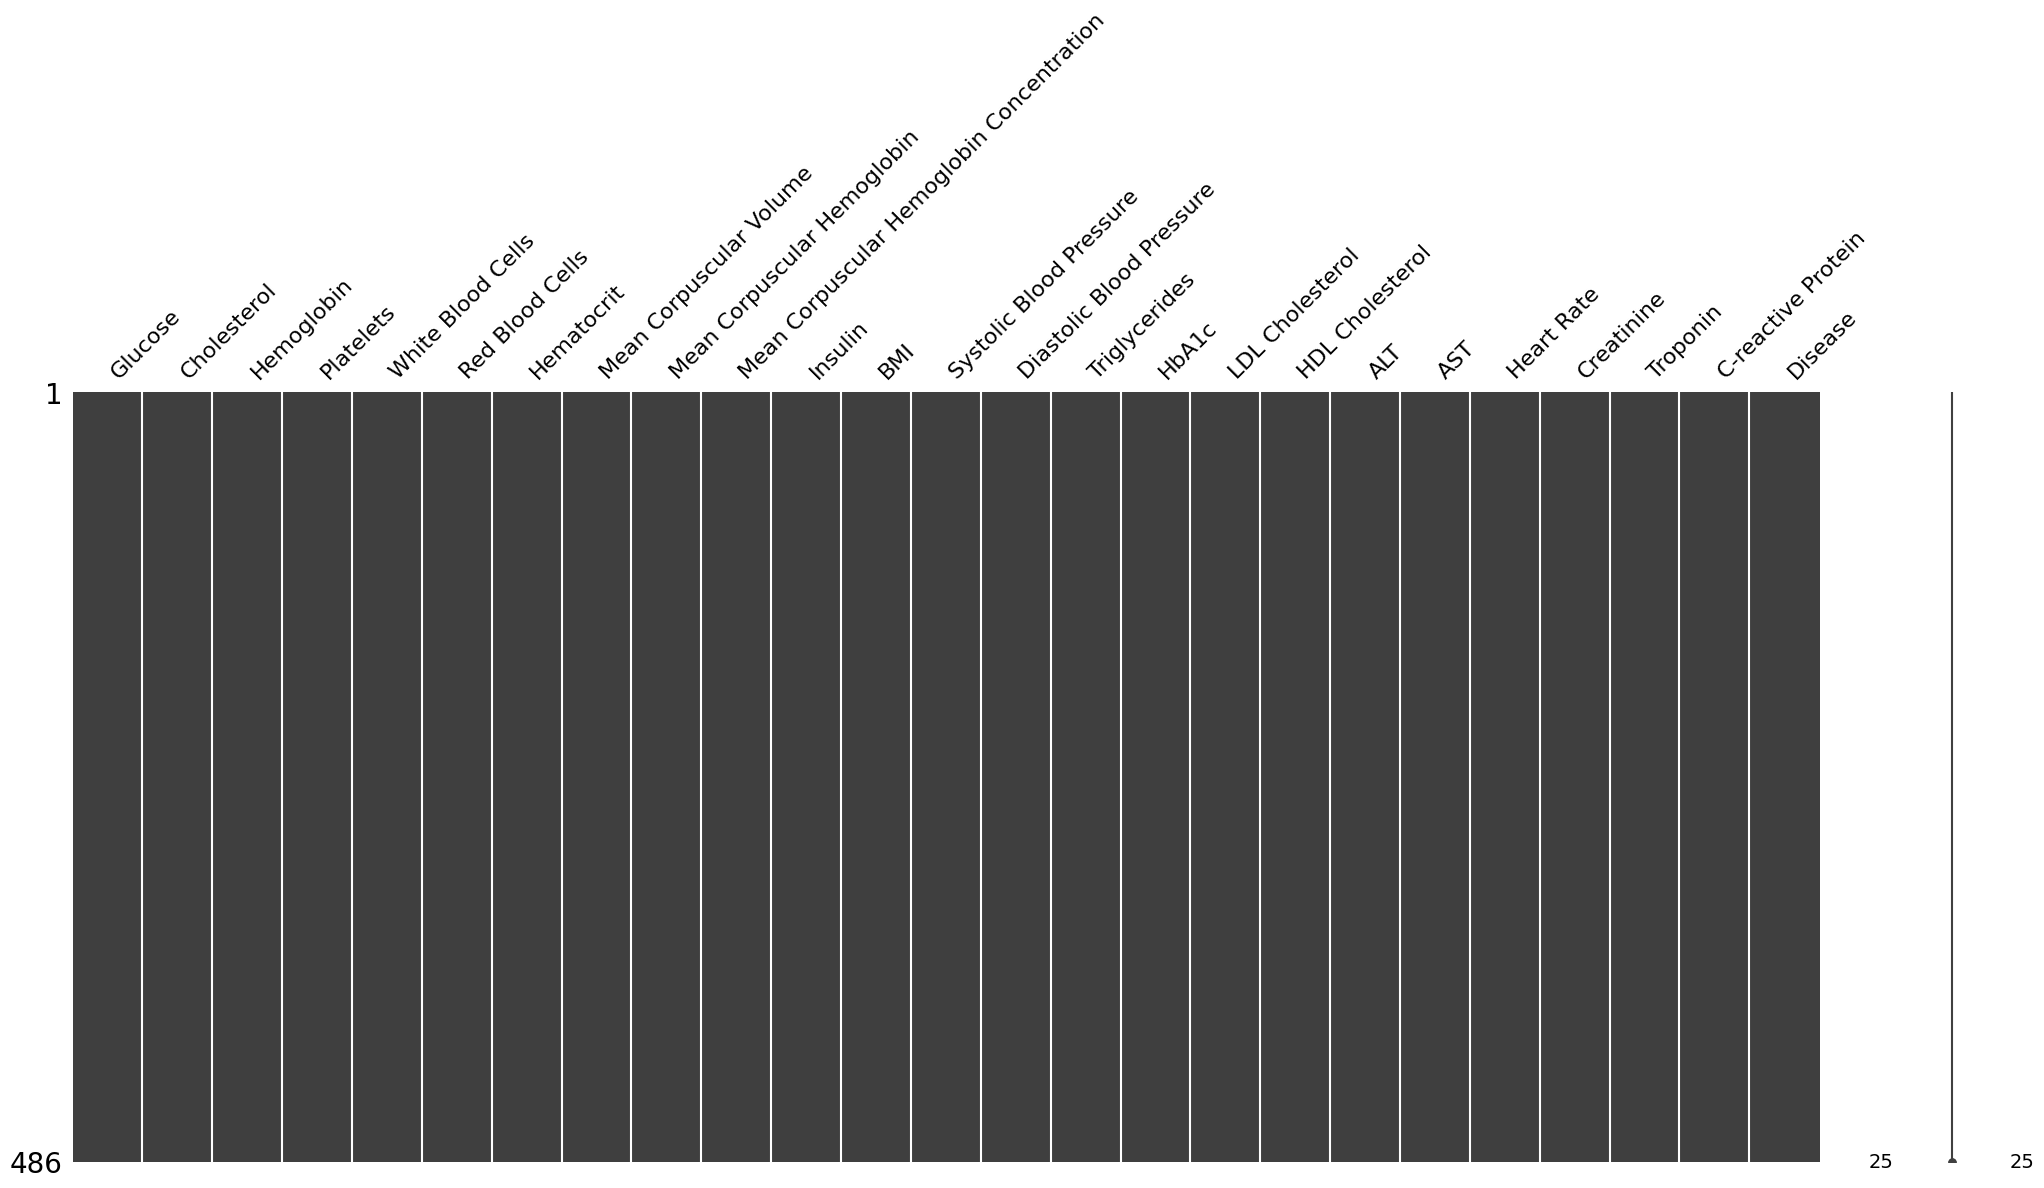

In [23]:
msno.matrix(df)
plt.show()

In [28]:
df.duplicated().sum()

0

In [ ]:
#Data processing

In [41]:
 cate_val =[]
cont_val = []
for column in df.columns:
    if df[column].nunique() <= 10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [39]:
cate_val

['Disease']

In [42]:
df['Disease'].unique()

array(['Thalasse', 'Diabetes', 'Heart Di', 'Anemia', 'Thromboc',
       'Healthy'], dtype=object)

In [43]:
pd.get_dummies(df,columns = cate_val, drop_first = True)

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease_Diabetes,Disease_Healthy,Disease_Heart Di,Disease_Thalasse,Disease_Thromboc
0,0.002,0.034,0.115,0.998,0.563,0.866,0.578,0.915,0.027,0.039,...,0.885,0.653,0.788,0.055,0.031,False,False,False,True,False
1,0.437,0.973,0.085,0.181,0.676,0.564,0.798,0.670,0.376,0.185,...,0.636,0.574,0.047,0.608,0.594,True,False,False,False,False
2,0.546,0.325,0.584,0.476,0.559,0.661,0.934,0.382,0.500,0.532,...,0.102,0.856,0.551,0.413,0.071,False,False,True,False,False
3,0.173,0.050,0.736,0.782,0.069,0.085,0.033,0.461,0.785,0.491,...,0.399,0.325,0.500,0.437,0.243,True,False,False,False,False
4,0.759,0.740,0.598,0.773,0.876,0.860,0.486,0.487,0.621,0.192,...,0.919,0.805,0.571,0.188,0.751,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,0.985,0.413,0.530,0.264,0.431,0.199,0.581,0.701,0.249,0.247,...,0.966,0.015,0.443,0.197,0.816,True,False,False,False,False
482,0.582,0.629,0.492,0.901,0.348,0.633,0.698,0.517,0.674,0.798,...,0.325,0.825,0.778,0.416,0.843,False,False,True,False,False
483,0.067,0.405,0.591,0.228,0.127,0.027,0.847,0.280,0.575,0.156,...,0.639,0.560,0.795,0.670,0.125,False,False,False,False,False
484,0.901,0.431,0.244,0.826,0.494,0.726,0.661,0.446,0.350,0.343,...,0.211,0.938,0.463,0.863,0.659,True,False,False,False,False


In [ ]:
#Correlation matrix

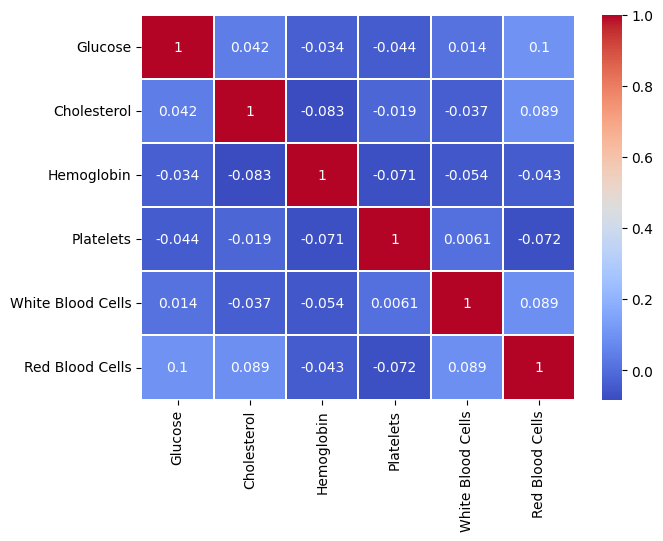

In [4]:
import matplotlib.pyplot as plt
cnames = ['Glucose','Cholesterol','Hemoglobin',	'Platelets','White Blood Cells','Red Blood Cells']
f, ax = plt.subplots(figsize=(7, 5))

#Correlation plot
df_corr = df.loc[:,cnames]
#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, annot = True, cmap='coolwarm',linewidths=.1)
plt.show()

In [ ]:
#Feature Scaling

In [45]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
df[cont_val] = st.fit_transform(df[cont_val])

In [46]:
df.head()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,-1.720,-1.674,-1.242,1.607,0.182,1.197,0.262,1.425,-1.696,-1.593,...,0.564,-1.102,-0.197,-1.698,1.281,0.544,0.950,-1.550,-1.668,Thalasse
1,-0.188,1.649,-1.342,-1.188,0.571,0.197,1.011,0.551,-0.470,-1.089,...,1.185,-1.217,-0.101,-0.346,0.453,0.276,-1.633,0.333,0.263,Diabetes
2,0.196,-0.644,0.332,-0.179,0.168,0.518,1.472,-0.481,-0.034,0.106,...,0.652,-0.982,1.126,0.668,-1.322,1.239,0.124,-0.330,-1.532,Heart Di
3,-1.117,-1.615,0.839,0.869,-1.515,-1.385,-1.591,-0.199,0.966,-0.033,...,-0.371,-0.148,-0.232,1.045,-0.334,-0.579,-0.056,-0.250,-0.943,Diabetes
4,0.946,0.825,0.376,0.837,1.259,1.176,-0.050,-0.105,0.389,-1.066,...,1.735,-0.801,0.601,-0.826,1.392,1.065,0.194,-1.095,0.801,Heart Di


In [ ]:
#Splitting the dataset into training and test set

In [8]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, -1].values
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 42)

In [11]:
X_test

array([[0.57043657, 0.4346725 , 0.6275876 , ..., 0.74277646, 0.22212665,
        0.23437834],
       [0.75231265, 0.62585689, 0.83518656, ..., 0.14543809, 0.97765258,
        0.46287897],
       [0.08205678, 0.31400916, 0.83875777, ..., 0.8090632 , 0.06717823,
        0.01302943],
       ...,
       [0.53944939, 0.77256947, 0.64057174, ..., 0.50118464, 0.32893177,
        0.20163482],
       [0.69382785, 0.37716513, 0.89865918, ..., 0.01967069, 0.62027538,
        0.03393296],
       [0.26934181, 0.01162404, 0.53357562, ..., 0.88066498, 0.26861565,
        0.9471976 ]])

In [54]:
y_test

array(['Anemia', 'Anemia', 'Heart Di', 'Diabetes', 'Diabetes', 'Diabetes',
       'Diabetes', 'Diabetes', 'Thromboc', 'Diabetes', 'Diabetes',
       'Anemia', 'Diabetes', 'Diabetes', 'Anemia', 'Anemia', 'Heart Di',
       'Thalasse', 'Diabetes', 'Anemia', 'Diabetes', 'Thalasse',
       'Diabetes', 'Diabetes', 'Diabetes', 'Diabetes', 'Thalasse',
       'Diabetes', 'Diabetes', 'Diabetes', 'Diabetes', 'Heart Di',
       'Diabetes', 'Diabetes', 'Thalasse', 'Thalasse', 'Diabetes',
       'Diabetes', 'Diabetes', 'Diabetes', 'Diabetes', 'Diabetes',
       'Diabetes', 'Diabetes', 'Diabetes', 'Thromboc', 'Anemia', 'Anemia',
       'Diabetes', 'Thalasse', 'Thalasse', 'Heart Di', 'Diabetes',
       'Diabetes', 'Diabetes', 'Diabetes', 'Anemia', 'Diabetes',
       'Thalasse', 'Anemia', 'Anemia', 'Anemia', 'Diabetes', 'Thromboc',
       'Heart Di', 'Diabetes', 'Diabetes', 'Anemia', 'Diabetes',
       'Diabetes', 'Diabetes', 'Diabetes', 'Diabetes', 'Diabetes',
       'Diabetes', 'Anemia', 'Diabetes',

In [ ]:
#Logisitc regression

In [15]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [16]:
y_pred1 = log.predict(X_test)

In [14]:
#CONFUSION MATRIX

<Axes: >

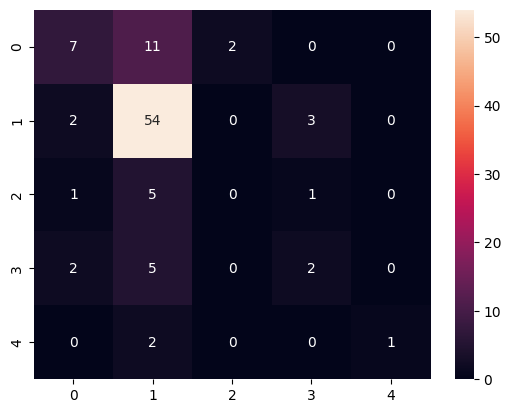

In [17]:
from sklearn.metrics import confusion_matrix
matrix= confusion_matrix(y_test, y_pred1)
sns.heatmap(matrix,annot = True, fmt = "d")

In [25]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred1,
                            pos_label='positive',
                                           average='micro')
print("Precision: ",precision)

from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred1, pos_label='positive',
                                           average='micro')
print("Recall is: ",recall)

Precision:  0.6530612244897959
Recall is:  0.6530612244897959


C:\Users\nithy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1561: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\nithy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1561: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [27]:
#F- Score
print((2*precision*recall)/(precision+recall))

0.6530612244897959


In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test ,y_pred1)

0.6530612244897959

In [ ]:
#SVC

In [30]:
from sklearn import svm
svm = svm.SVC()
svm.fit(X_train,y_train)

SVC()

In [31]:
y_pred2 = svm.predict(X_test)
accuracy_score(y_test ,y_pred2)

0.673469387755102

<Axes: >

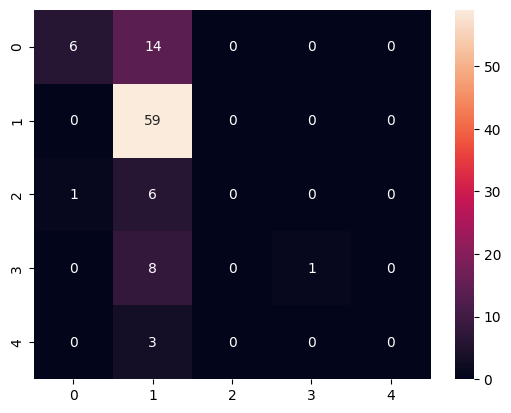

In [32]:
from sklearn.metrics import confusion_matrix
matrix= confusion_matrix(y_test, y_pred2)
sns.heatmap(matrix,annot = True, fmt = "d")

In [36]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred2,
                            pos_label='positive',
                                           average='micro')
print("Precision: ",precision)

from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred2, pos_label='positive',
                                           average='micro')
print("Recall is: ",recall)

Precision:  0.673469387755102
Recall is:  0.673469387755102


C:\Users\nithy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1561: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\nithy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1561: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [38]:
#F- Score
print((2*precision*recall)/(precision+recall))

0.673469387755102


In [39]:
# K Neighbours Classifier

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [43]:
y_pred3 = knn.predict(X_test)
accuracy_score(y_test ,y_pred3)

0.6836734693877551

<Axes: >

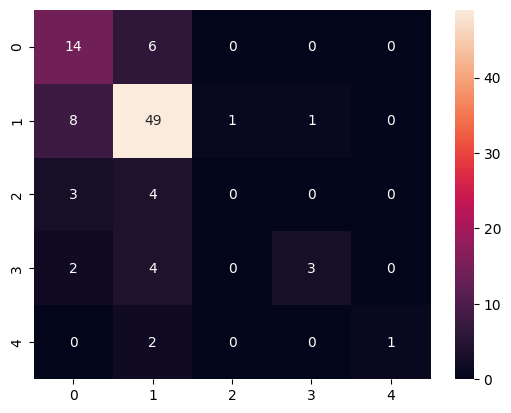

In [44]:
from sklearn.metrics import confusion_matrix
matrix= confusion_matrix(y_test, y_pred3)
sns.heatmap(matrix,annot = True, fmt = "d")

In [45]:
score = []
for k in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    score.append(accuracy_score(y_test,y_pred))
    

In [68]:
score

[0.41836734693877553,
 0.5408163265306123,
 0.5408163265306123,
 0.6020408163265306,
 0.6530612244897959,
 0.6938775510204082,
 0.7040816326530612,
 0.6530612244897959,
 0.7040816326530612,
 0.7040816326530612,
 0.6428571428571429,
 0.6632653061224489,
 0.6428571428571429,
 0.673469387755102,
 0.6428571428571429,
 0.6530612244897959,
 0.6428571428571429,
 0.6632653061224489,
 0.6632653061224489,
 0.673469387755102,
 0.673469387755102,
 0.6836734693877551,
 0.6530612244897959,
 0.6632653061224489,
 0.6530612244897959,
 0.6632653061224489,
 0.6632653061224489,
 0.6632653061224489,
 0.6632653061224489,
 0.6326530612244898,
 0.6428571428571429,
 0.6122448979591837,
 0.6122448979591837,
 0.6122448979591837,
 0.6122448979591837,
 0.6122448979591837,
 0.6122448979591837,
 0.6020408163265306,
 0.6020408163265306]

In [69]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test,y_pred)
    

0.7040816326530612

In [ ]:
#Precision and Recall score

In [46]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred3,
                            pos_label='positive',
                                           average='micro')
print("Precision: ",precision)

from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred3, pos_label='positive',
                                           average='micro')
print("Recall is: ",recall)

Precision:  0.6836734693877551
Recall is:  0.6836734693877551


C:\Users\nithy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1561: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\nithy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1561: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [48]:
#F-Score
print((2*precision*recall)/(precision+recall))

0.6836734693877551


In [47]:
#Non-linear ML algorithms

In [4]:
import pandas as pd
df = pd.read_csv('test_data.csv')
df.head()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.001827,0.033693,0.114755,0.997927,0.562604,0.866499,0.578042,0.914615,0.026864,0.038641,...,0.653230,0.186104,0.430398,0.016678,0.885352,0.652733,0.788235,0.054788,0.031313,Thalasse
1,0.436679,0.972653,0.084998,0.180909,0.675736,0.563889,0.798382,0.670361,0.376092,0.184890,...,0.833540,0.153001,0.458533,0.401845,0.635969,0.574425,0.047025,0.607985,0.594123,Diabetes
2,0.545697,0.324815,0.584467,0.475748,0.558596,0.661007,0.934056,0.381782,0.500342,0.531829,...,0.678901,0.220479,0.817151,0.690981,0.101633,0.855740,0.551124,0.413294,0.070909,Heart Di
3,0.172994,0.050351,0.736000,0.782022,0.069435,0.085219,0.032907,0.460619,0.785448,0.491495,...,0.381500,0.459396,0.420154,0.798537,0.399236,0.324600,0.499504,0.436662,0.242766,Diabetes
4,0.758534,0.739968,0.597868,0.772683,0.875720,0.860265,0.486189,0.486686,0.621048,0.191756,...,0.993381,0.272338,0.663579,0.265227,0.918847,0.804910,0.571119,0.188368,0.750848,Heart Di


In [7]:
df = df.drop_duplicates()

In [10]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, -1].values


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 42)

In [12]:
#Decision Tree Classifier

In [50]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [51]:
y_pred4 = dt.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred4)

0.9693877551020408

<Axes: >

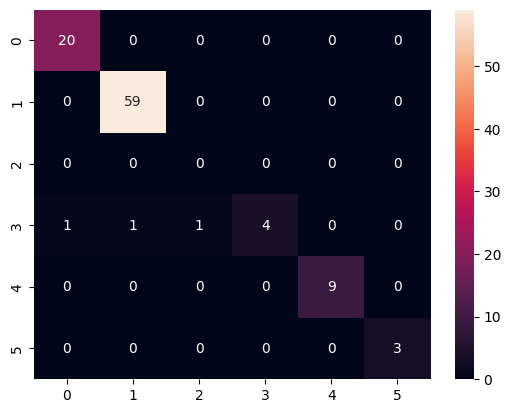

In [52]:
from sklearn.metrics import confusion_matrix
matrix= confusion_matrix(y_test, y_pred4)
sns.heatmap(matrix,annot = True, fmt = "d")

In [53]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred4,
                            pos_label='positive',
                                           average='micro')
print("Precision: ",precision)

from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred4, pos_label='positive',
                                           average='micro')
print("Recall is: ",recall)

Precision:  0.9693877551020408
Recall is:  0.9693877551020408


C:\Users\nithy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1561: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\nithy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1561: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [55]:
#F-Score
print((2*precision*recall)/(precision+recall))

0.9693877551020408


In [54]:
#Random Forest Claasifier

In [56]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [58]:
y_pred5 = rf.predict(X_test)
accuracy_score(y_test,y_pred5)

0.9387755102040817

<Axes: >

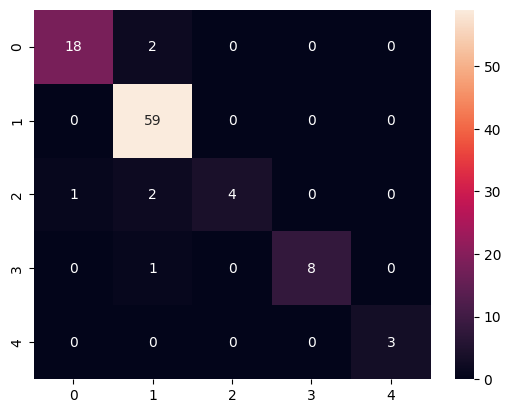

In [59]:
from sklearn.metrics import confusion_matrix
matrix= confusion_matrix(y_test, y_pred5)
sns.heatmap(matrix,annot = True, fmt = "d")

In [60]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred5,
                            pos_label='positive',
                                           average='micro')
print("Precision: ",precision)

from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred5, pos_label='positive',
                                           average='micro')
print("Recall is: ",recall)

Precision:  0.9387755102040817
Recall is:  0.9387755102040817


C:\Users\nithy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1561: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\nithy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1561: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [61]:
#F-Score
print((2*precision*recall)/(precision+recall))

0.9387755102040817


In [ ]:
#Gradient Boosting Classifier

In [62]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)


GradientBoostingClassifier()

In [63]:
y_pred6 = gbc.predict(X_test)
accuracy_score(y_test,y_pred6)

0.9693877551020408

<Axes: >

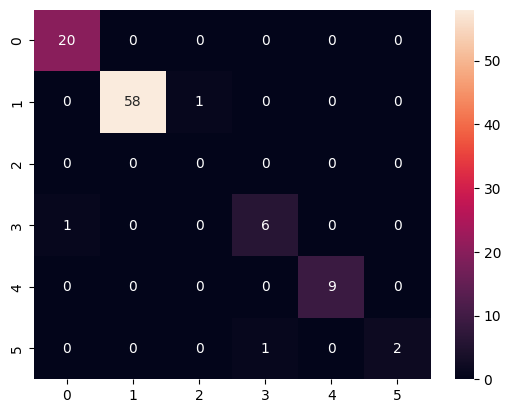

In [64]:
from sklearn.metrics import confusion_matrix
matrix= confusion_matrix(y_test, y_pred6)
sns.heatmap(matrix,annot = True, fmt = "d")

In [65]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred6,
                            pos_label='positive',
                                           average='micro')
print("Precision: ",precision)

from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred6, pos_label='positive',
                                           average='micro')
print("Recall is: ",recall)

Precision:  0.9693877551020408
Recall is:  0.9693877551020408


C:\Users\nithy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1561: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\nithy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1561: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [66]:
#F-Score
print((2*precision*recall)/(precision+recall))

0.9693877551020408


In [38]:
final_data = pd.DataFrame({ 'Models' : ['LR','SVM','KNN','DT','RF','GB'],
                           'ACC':[accuracy_score(y_test,y_pred1),
                                 accuracy_score(y_test,y_pred2),
                                 accuracy_score(y_test,y_pred3),
                                 accuracy_score(y_test,y_pred4),
                                 accuracy_score(y_test,y_pred5),
                                 accuracy_score(y_test,y_pred6)]})

In [39]:
final_data

,Models,ACC
0,LR,0.653061
1,SVM,0.673469
2,KNN,0.683673
3,DT,0.969388
4,RF,0.928571
5,GB,0.959184


In [42]:
import seaborn as sns


C:\Users\nithy\AppData\Local\Temp\ipykernel_27584\629735148.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = final_data.Models,y = final_data.ACC,color = 'blue', palette = 'hls')


<Axes: xlabel='Models', ylabel='ACC'>

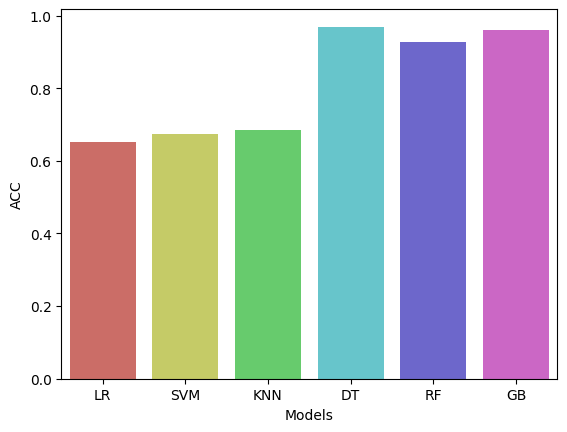

In [57]:
sns.barplot(x = final_data.Models,y = final_data.ACC,color = 'blue', palette = 'hls')

In [ ]:
#Predcition on new Data

In [4]:
import pandas as pd

# Assuming data is provided in a CSV format or directly as a DataFrame
data = {
    'Glucose': [0.001827, 0.436679, 0.545697, 0.172994, 0.758534],
    'Cholesterol': [0.033693, 0.972653, 0.324815, 0.050351, 0.739968],
    'Hemoglobin': [0.114755, 0.084998, 0.584467, 0.736, 0.597868],
    'Platelets': [0.997927, 0.180909, 0.475748, 0.782022, 0.772683],
    'White Blood Cells': [0.562604, 0.675736, 0.558596, 0.069435, 0.87572],
    'Red Blood Cells': [0.866499, 0.563889, 0.661007, 0.085219, 0.860265],
    'Hematocrit': [0.578042, 0.798382, 0.934056, 0.032907, 0.486189],
    'Mean Corpuscular Volume': [0.914615, 0.670361, 0.381782, 0.460619, 0.486686],
    'Mean Corpuscular Hemoglobin': [0.026864, 0.376092, 0.500342, 0.785448, 0.621048],
    'Mean Corpuscular Hemoglobin Concentration': [0.038641, 0.18489, 0.531829, 0.491495, 0.191756],
    'HbA1c': [0.65323, 0.83354, 0.678901, 0.3815, 0.993381],
    'LDL Cholesterol': [0.186104, 0.153001, 0.220479, 0.459396, 0.272338],
    'HDL Cholesterol': [0.430398, 0.458533, 0.817151, 0.420154, 0.663579],
    'ALT': [0.016678, 0.401845, 0.690981, 0.798537, 0.265227],
    'AST': [0.885352, 0.635969, 0.101633, 0.399236, 0.918847],
    'Heart Rate': [0.652733, 0.574425, 0.85574, 0.3246, 0.80491],
    'Creatinine': [0.788235, 0.047025, 0.551124, 0.499504, 0.571119],
    'Troponin': [0.054788, 0.607985, 0.413294, 0.436662, 0.188368],
    'C-reactive Protein': [0.031313, 0.594123, 0.070909, 0.242766, 0.750848],
    'Disease': [1, 1, 1, 1, 1]  # Assuming 1 means diseased
}

df = pd.DataFrame(data)


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Encoding the target variable
label_encoder = LabelEncoder()
df['Disease'] = label_encoder.fit_transform(df['Disease'])

# Separate features and target
X = df.drop(columns=['Disease'])
y = df['Disease']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
from sklearn import tree
dtc = tree.DecisionTreeClassifier()
dtc = dtc.fit(X_train,y_train)


In [86]:
# Example new patient data (normalized as the provided data)
new_patient_data = {
    'Glucose': 0.5,
    'Cholesterol': 0.4,
    'Hemoglobin': 0.6,
    'Platelets': 0.7,
    'White Blood Cells': 0.6,
    'Red Blood Cells': 0.5,
    'Hematocrit': 0.8,
    'Mean Corpuscular Volume': 0.6,
    'Mean Corpuscular Hemoglobin': 0.5,
    'Mean Corpuscular Hemoglobin Concentration': 0.4,
    'HbA1c': 0.7,
    'LDL Cholesterol': 0.3,
    'HDL Cholesterol': 0.6,
    'ALT': 0.4,
    'AST': 0.7,
    'Heart Rate': 0.6,
    'Creatinine': 0.5,
    'Troponin': 0.4,
    'C-reactive Protein': 0.6
}

# Convert new patient data to DataFrame
new_patient_df = pd.DataFrame([new_patient_data])

# Apply the same preprocessing (not needed in this case since it's already numerical)
# new_patient_encoded = encoder.transform(new_patient_df)

# Make a prediction
prediction = dtc.predict(new_patient_df)

# Convert prediction to the disease label
predicted_disease = label_encoder.inverse_transform(prediction)

if predicted_disease[0] == 1:
    print("The patient is predicted to be diseased.")
else:
    print("The patient is predicted to be healthy.")


The patient is predicted to be healthy.


In [ ]:
#Save model using Joblib

In [87]:
import joblib

In [88]:
joblib.dump(dtc, 'model_joblib_disease')

['model_joblib_disease']

In [89]:
model = joblib.load('model_joblib_disease')

In [ ]:
#Graphical user Interface

In [ ]:
import tkinter as tk
from tkinter import Label, Button, Entry
import joblib
import threading

def show_entry_fields():
    try:
        p1 = float(e1.get())
        p2 = float(e2.get())
        p3 = float(e3.get())
        p4 = float(e4.get())
        p5 = float(e5.get())
        p6 = float(e6.get())
        p7 = float(e7.get())
        p8 = float(e8.get())
        p9 = float(e9.get())
        p10 = float(e10.get())
        p11 = float(e11.get())
        p12 = float(e12.get())
        p13 = float(e13.get())
        p14 = float(e14.get())
        p15 = float(e15.get())
        p16 = float(e16.get())
        p17 = float(e17.get())
        p18 = float(e18.get())
        p19 = float(e19.get())
        
        model = joblib.load('model_joblib_disease')
        result = model.predict([[p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12, p13, p14, p15, p16, p17, p18, p19]])

        if result[0] == 0:
            Label(master, text="The patient is predicted to be healthy").grid(row=21, columnspan=2)
        else:
            Label(master, text="The patient is predicted to be diseased").grid(row=21, columnspan=2)
    except ValueError:
        Label(master, text="Please enter valid numeric values").grid(row=21, columnspan=2)

def run_tkinter():
    global master, e1, e2, e3, e4, e5, e6, e7, e8, e9, e10, e11, e12, e13, e14, e15, e16, e17, e18, e19

    master = tk.Tk()
    master.title("Disease Prediction")

    Label(master, text="Disease Prediction System", bg="black", fg="white").grid(row=0, columnspan=2)

    labels = [
        "Enter Glucose", "Enter Cholesterol", "Enter Hemoglobin", "Enter Platelets", 
        "Enter White Blood Cells", "Enter Red Blood Cells", "Enter Hematocrit", 
        "Enter Mean Corpuscular Volume", "Enter Mean Corpuscular Hemoglobin", 
        "Enter Mean Corpuscular Hemoglobin Concentration", "Enter HbA1c", 
        "Enter LDL Cholesterol", "Enter HDL Cholesterol", "Enter ALT", 
        "Enter AST", "Enter Heart Rate", "Enter Creatinine", "Enter Troponin", 
        "Enter C-reactive Protein"
    ]

    entries = []
    for i, label in enumerate(labels):
        Label(master, text=label).grid(row=i+1)
        entry = Entry(master)
        entry.grid(row=i+1, column=1)
        entries.append(entry)

    e1, e2, e3, e4, e5, e6, e7, e8, e9, e10, e11, e12, e13, e14, e15, e16, e17, e18, e19 = entries

    Button(master, text="Predict", command=show_entry_fields).grid(row=20, columnspan=2)

    master.mainloop()

# Run the tkinter GUI in a separate thread
thread = threading.Thread(target=run_tkinter)
thread.start()

           